# Tutorial 38: Mean Kurtosis Optimization

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'AMZN', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'AAPL', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].iloc[-300:,:].pct_change().dropna()

display(Y.head())

,AAPL,AMZN,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,...,MO,MSFT,NI,PCAR,SEE,T,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-19,1.5230%,-0.3778%,0.0476%,-0.8599%,-1.4332%,-3.0011%,0.1113%,1.2968%,3.4361%,-0.8764%,...,1.6740%,0.1475%,0.6339%,-0.1823%,-0.7728%,1.1384%,-1.1145%,-1.2872%,0.4574%,-0.8025%
2018-10-22,0.6110%,1.4325%,-1.9240%,-0.0786%,-0.6335%,-6.2983%,-0.6392%,-1.1024%,0.0527%,-0.3221%,...,-1.0331%,0.8927%,-0.8661%,0.4483%,-2.8972%,-0.6085%,-0.6075%,-0.8634%,0.1457%,-3.4490%
2018-10-23,0.9426%,-1.1513%,-3.6571%,-1.6658%,-0.4202%,-0.4520%,-0.2797%,-0.5034%,0.1845%,-3.9948%,...,0.8808%,-1.3956%,0.4766%,-5.1240%,-0.0321%,1.0713%,-1.0807%,-1.8308%,4.0560%,4.0353%
2018-10-24,-3.4301%,-5.9083%,-4.5500%,1.3141%,-1.8042%,-3.5933%,-4.2917%,0.8673%,0.9995%,-4.1109%,...,0.7437%,-5.3469%,3.5178%,-4.2683%,-1.3479%,-8.0557%,-1.2403%,-4.2187%,0.3671%,-3.3065%
2018-10-25,2.1898%,7.0887%,0.4741%,2.5715%,0.5186%,0.7782%,5.0410%,-0.5733%,-1.1719%,2.1585%,...,1.3642%,5.8444%,-1.0309%,0.4914%,0.9109%,-1.2517%,4.3662%,1.3799%,-1.7241%,3.3538%


## 2. Estimating Mean Kurtosis Portfolios

### Mean Kurtosis Portfolios 설명

**Mean Kurtosis Portfolios**는 포트폴리오 최적화에서 평균과 첨도(Kurtosis)를 고려하여 포트폴리오를 구성하는 접근 방식입니다. 첨도는 자산 수익률 분포의 꼬리 부분의 두터움을 나타내며, 높은 첨도는 극단적인 값이 발생할 가능성이 높음을 의미합니다. 따라서, 평균과 첨도를 동시에 고려하는 포트폴리오는 수익률의 중앙 경향성과 극단적인 리스크를 함께 관리할 수 있습니다.

### Mean Kurtosis Portfolios 최적화

1. **데이터 준비**
2. **포트폴리오 객체 생성**
3. **기대 수익률 및 공분산 행렬 계산**
4. **최적화 매개변수 설정**
5. **최적 포트폴리오 계산**
6. **결과 출력**

### 예제 코드

아래 예제 코드는 Mean Kurtosis Portfolios를 최적화하는 방법을 보여줍니다.

```python
import numpy as np
import pandas as pd
import riskfolio as rp

# 1. 데이터 준비
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 2. 포트폴리오 객체 생성
port = rp.Portfolio(returns=returns)

# 3. 기대 수익률 및 공분산 행렬 계산
method_mu = 'hist'  # 역사적 데이터를 사용하여 기대 수익률 추정
method_cov = 'hist'  # 역사적 데이터를 사용하여 공분산 행렬 추정
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# 4. 최적화 매개변수 설정
model = 'Classic'  # 사용할 모델: Classic (historical), BL (Black Litterman), FM (Factor Model)
rm = 'MK'  # 리스크 측정치: Mean-Kurtosis
obj = 'Sharpe'  # 목표 함수: Sharpe 비율 최대화
hist = True  # 역사적 시나리오 사용 여부
rf = 0  # 무위험 이자율
l = 0  # 리스크 회피 계수 (유틸리티 목표 함수에서만 사용)

# 5. 최적 포트폴리오 계산
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

# 6. 결과 출력
display(w.T)
```

### 코드 설명

1. **데이터 준비**:
   ```python
   np.random.seed(42)
   Y = np.random.randn(100, 10)
   asset_names = [f'Asset {i}' for i in range(1, 11)]
   returns = pd.DataFrame(Y, columns=asset_names)
   ```
   - 예시 데이터를 생성하고 자산 이름을 설정합니다.

2. **포트폴리오 객체 생성**:
   ```python
   port = rp.Portfolio(returns=returns)
   ```

   - `rp.Portfolio` 클래스를 사용하여 포트폴리오 객체를 생성합니다.

3. **기대 수익률 및 공분산 행렬 계산**:
   ```python
   method_mu = 'hist'
   method_cov = 'hist'
   port.assets_stats(method_mu=method_mu, method_cov=method_cov)
   ```

   - 역사적 데이터를 사용하여 기대 수익률 및 공분산 행렬을 추정합니다.

4. **최적화 매개변수 설정**:
   ```python
   model = 'Classic'
   rm = 'MK'  # Mean-Kurtosis
   obj = 'Sharpe'
   hist = True
   rf = 0
   l = 0
   ```

   - `model`은 클래식 모델을 사용합니다.
   - `rm`은 Mean-Kurtosis를 리스크 측정치로 사용합니다.
   - `obj`는 Sharpe 비율을 최대화하는 목표 함수로 설정합니다.
   - `hist`는 역사적 시나리오를 사용 여부를 설정합니다.
   - `rf`는 무위험 이자율을 0으로 설정합니다.
   - `l`은 리스크 회피 계수를 0으로 설정합니다.

5. **최적 포트폴리오 계산**:
   ```python
   w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
   ```

   - `port.optimization` 함수를 사용하여 지정된 매개변수에 따라 포트폴리오를 최적화합니다.
   - 최적화된 포트폴리오 가중치 벡터 `w`를 반환합니다.

6. **결과 출력**:
   ```python
   display(w.T)
   ```

   - `display(w.T)` 함수를 사용하여 최적화된 포트폴리오 가중치를 전치하여 보기 좋게 출력합니다.

### Mean Kurtosis Portfolios의 장점

1. **중앙 경향성과 극단적 리스크 관리**: 평균과 첨도를 동시에 고려하여 포트폴리오를 구성함으로써, 수익률의 중앙 경향성과 극단적인 리스크를 함께 관리할 수 있습니다.
2. **유연한 리스크 측정**: 투자자의 리스크 선호도에 따라 첨도를 사용하여 포트폴리오의 리스크를 세밀하게 조정할 수 있습니다.
3. **극단적 상황에 대비**: 첨도가 높은 자산을 적절히 조정하여, 극단적 상황에서의 리스크를 더 잘 관리할 수 있습니다.

### 결론

Mean Kurtosis Portfolios는 평균과 첨도를 동시에 고려하여 포트폴리오를 최적화하는 방법입니다. 이 접근 방식은 포트폴리오의 중앙 경향성과 극단적 리스크를 함께 관리할 수 있어, 보다 안정적이고 효율적인 포트폴리오 구성을 가능하게 합니다. 위 예제 코드는 Mean Kurtosis Portfolios를 최적화하는 방법을 보여주며, 다양한 투자 전략을 검토하고 실행하는 데 유용합니다.

Cajas(2022)가 제안한 Kurtosis 포트폴리오 모델은 포트폴리오 수익률의 네 번째 모멘트를 포트폴리오 분산과 유사한 방식으로 최적화하는 방법을 보여줍니다.

이 모델은 준정합 프로그래밍(semidefinite programming)을 사용하므로 많은 수의 자산을 최적화할 때는 MOSEK를 사용하는 것이 좋습니다. 또한, 많은 수의 자산을 다룰 때는 이 모델의 이완된 버전(relaxed version)을 사용하는 것이 권장됩니다. 이 이완된 버전은 2차원 원뿔 프로그래밍(second order cone programming)을 기반으로 합니다. 이완된 버전을 사용하려면 자산의 수가 속성 `n_max_kurt`보다 많아야 합니다. 예를 들어, 자산의 수가 30이고 `port.n_max_kurt = 25`로 설정하면, Riskfolio-lib는 이완된 버전을 사용할 것입니다.

MOSEK를 설치하는 방법은 이 링크에서 확인할 수 있으며, Anaconda를 사용하는 것이 좋습니다. 또한, 학술용 라이선스를 요청하는 것이 좋습니다.

- [MOSEK 설치 지침](https://www.mosek.com/products/academic-licenses/)

### 2.1 Calculating the portfolio that optimize return/kurtosis ratio.

In [3]:
import riskfolio as rp
import mosek

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.
method_kurt='hist' # Method to estimate cokurtosis square matrix based on historical data.

port.assets_stats(method_mu=method_mu,
                  method_cov=method_cov,
                  method_kurt=method_kurt,
                  )

port.solvers = ['MOSEK'] # It is recommended to use mosek when optimizing Kurtosis

# Estimate optimal portfolio:
model ='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'KT' # Risk measure used, this time will be Tail Gini Range
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

You must convert self.kurt to a positive definite matrix
You must convert self.skurt to a positive definite matrix


,AAPL,AMZN,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,...,MO,MSFT,NI,PCAR,SEE,T,TMO,TXT,VZ,ZION
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,4.7028%,0.0000%,0.0000%,11.1101%,0.0000%,...,0.0000%,0.0000%,2.9797%,5.4945%,8.0199%,4.8793%,1.2579%,0.0000%,23.3524%,0.0000%


### 2.2 Plotting portfolio composition

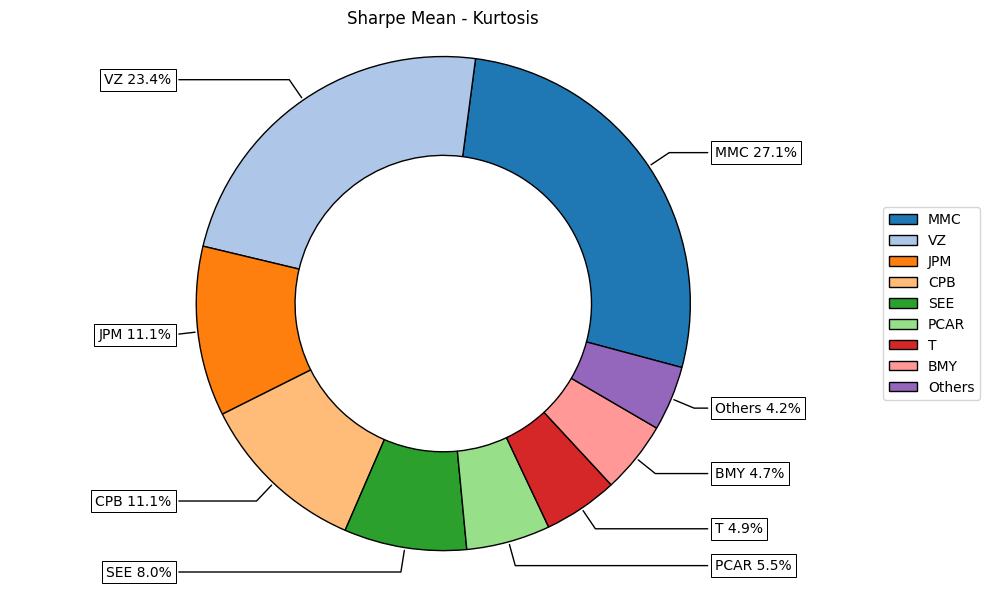

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='Sharpe Mean - Kurtosis',
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=6,
                 width=10,
                 ax=None)

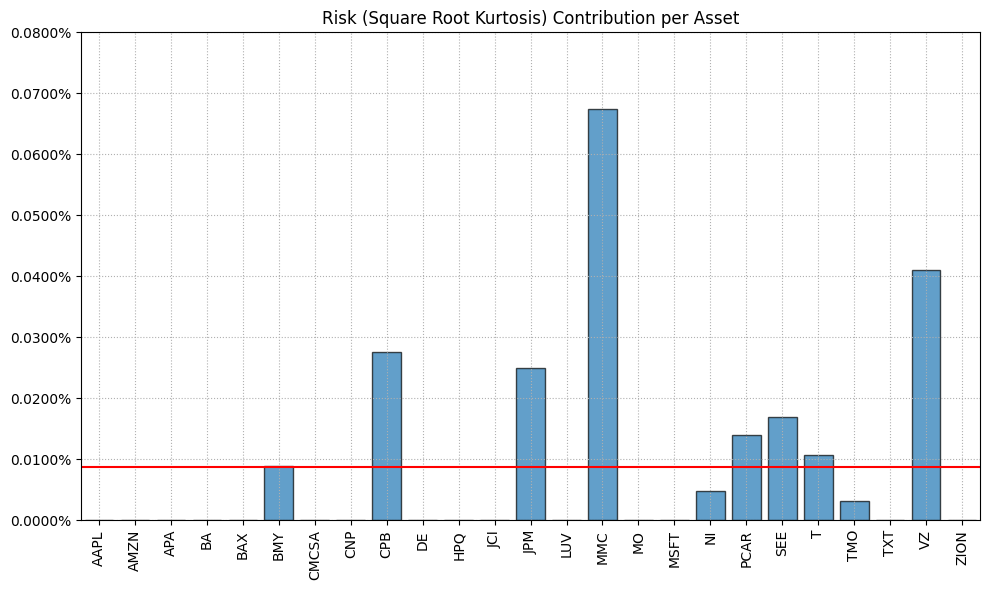

In [15]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05,
                      color="tab:blue", height=6, width=10, ax=None)

### 2.3 Plotting risk measures

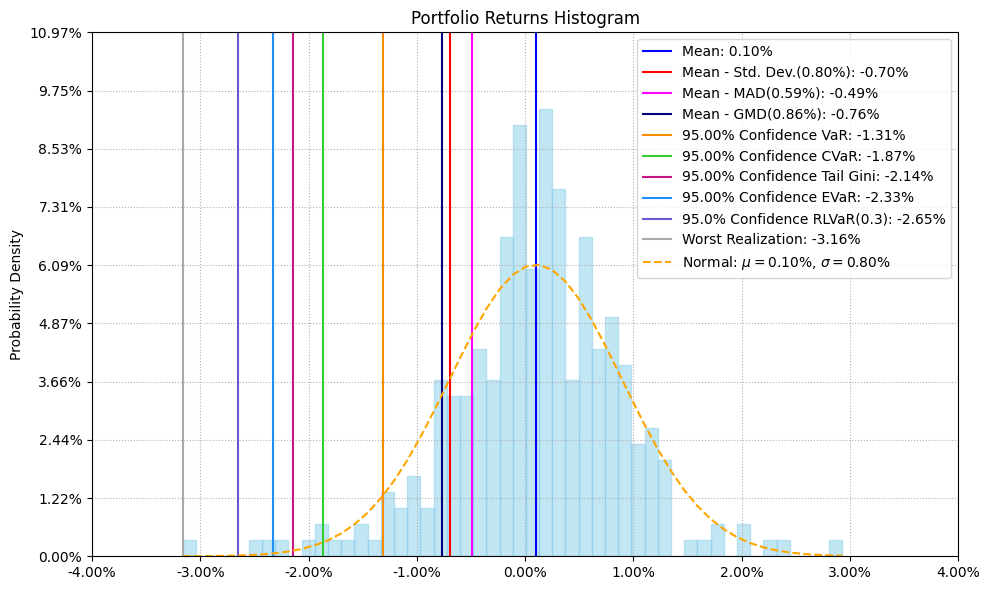

In [5]:
ax = rp.plot_hist(returns=Y,
                  w=w,
                  alpha=0.05,
                  bins=50,
                  height=6,
                  width=10,
                  ax=None)

### 2.4 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,AMZN,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,...,MO,MSFT,NI,PCAR,SEE,T,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,0.0000%,0.0000%,0.6894%,6.6517%,4.7593%,17.4512%,0.0000%,0.0000%,...,11.7019%,0.0000%,10.5490%,0.0000%,8.5919%,0.5056%,0.0000%,0.0000%,26.1991%,3.3166%
1,0.0000%,0.0000%,0.0000%,0.0000%,0.0001%,6.6968%,1.6974%,6.4670%,3.6873%,0.0000%,...,0.9022%,0.0000%,10.1657%,0.0000%,10.1178%,4.9221%,0.0000%,0.0000%,27.3729%,0.0000%
2,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,6.1762%,0.0000%,0.0000%,7.7138%,0.0000%,...,0.0000%,0.0000%,8.0393%,1.2117%,9.4793%,5.8511%,0.0000%,0.0000%,26.0666%,0.0000%
3,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,4.9226%,0.0000%,0.0000%,10.8111%,0.0000%,...,0.0000%,0.0000%,3.4607%,5.0189%,8.1535%,4.9603%,0.8984%,0.0000%,23.6465%,0.0000%
4,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,3.4453%,0.0000%,0.0000%,12.6919%,0.0000%,...,0.0000%,0.0000%,0.5355%,8.2393%,7.3102%,4.4611%,3.2100%,0.0000%,21.7046%,0.0000%


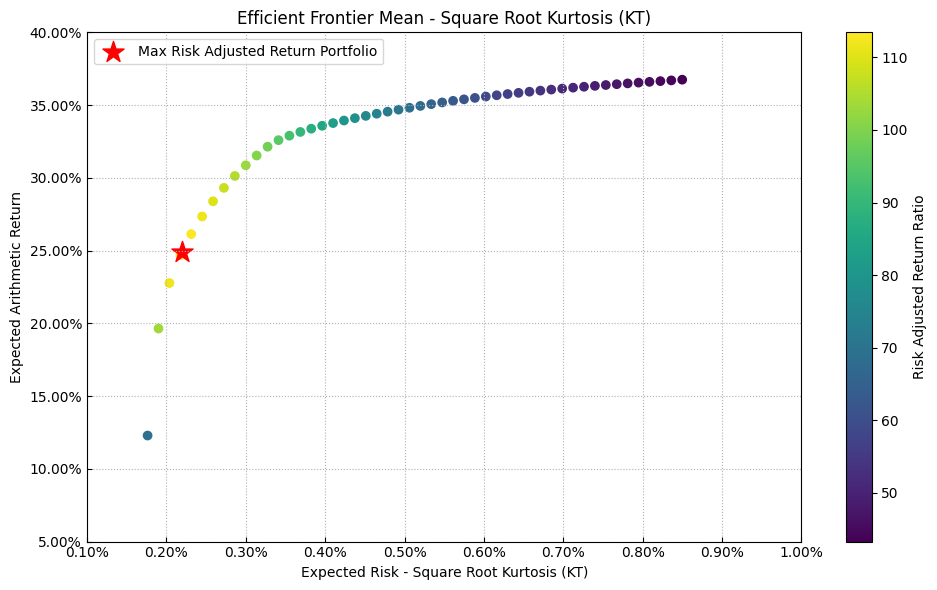

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

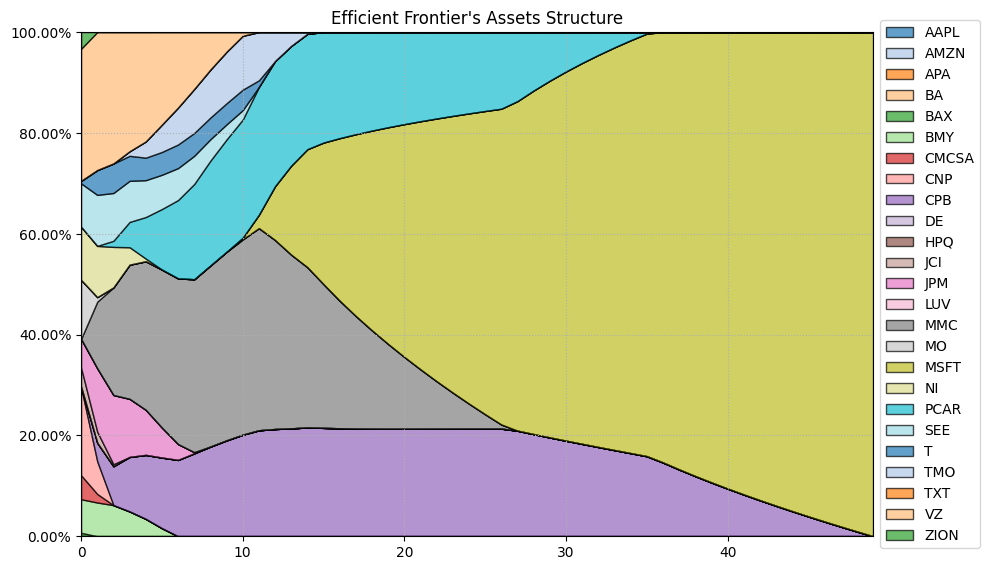

In [8]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Estimating Risk Parity Portfolios for Square Root Kurtosis

### 3.1 Calculating the risk parity portfolio for Square Root Kurtosis.

In [9]:
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,AAPL,AMZN,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,...,MO,MSFT,NI,PCAR,SEE,T,TMO,TXT,VZ,ZION
weights,2.4551%,2.3390%,2.3561%,2.9710%,3.8988%,4.2350%,4.0183%,6.7929%,5.1240%,2.6398%,...,5.7290%,2.7139%,7.0910%,3.2300%,4.6015%,4.4500%,3.2760%,3.3235%,7.4288%,3.4346%


### 3.2 Plotting portfolio composition

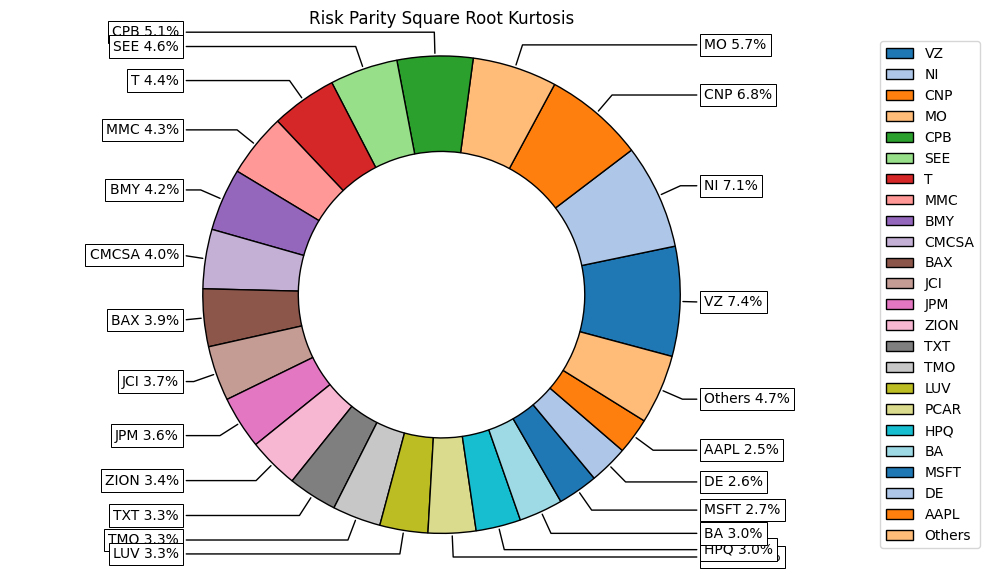

In [10]:
ax = rp.plot_pie(w=w_rp,
                 title='Risk Parity Square Root Kurtosis',
                 others=0.05,
                 nrow=25,
                 cmap="tab20",
                 height=6,
                 width=10,
                 ax=None)

### 3.3 Plotting Risk Composition

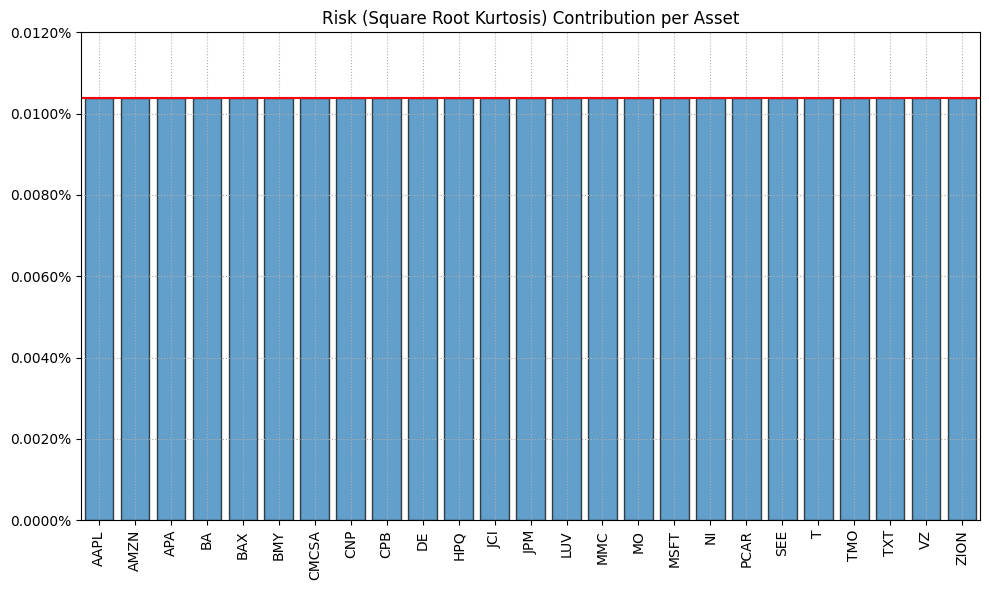

In [11]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05,
                      color="tab:blue", height=6, width=10, ax=None)

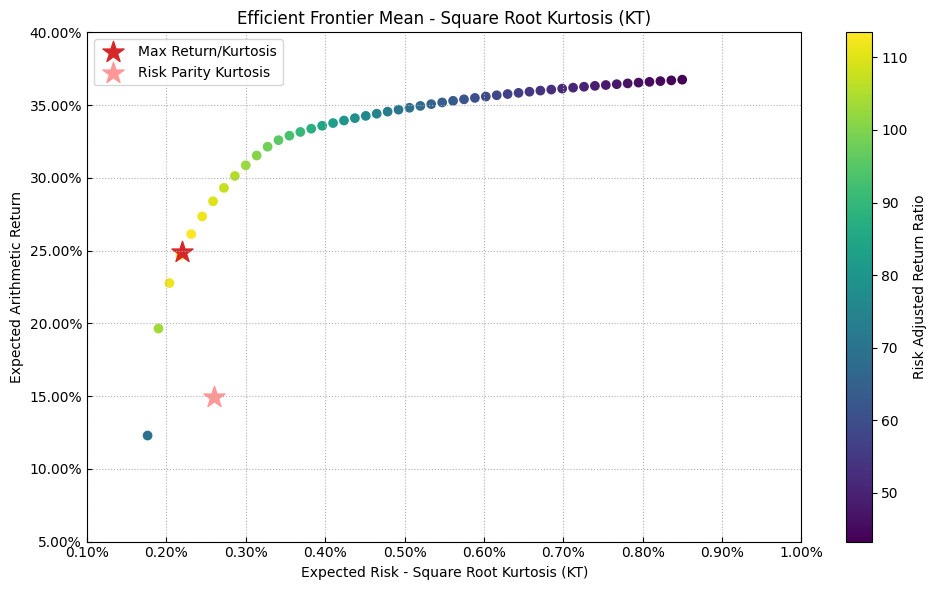

In [12]:
# Plotting the efficient frontier
ws = pd.concat([w, w_rp],axis=1)
ws.columns = ["Max Return/Kurtosis", "Risk Parity Kurtosis"]

mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=ws,
                      marker='*', s=16, height=6, width=10, ax=None)